**Importing packages**

In [ ]:
!pip install scikit-learn-extra
!pip install pyclustertend
!pip install pyclustering 

     |████████████████████████████████| 624kB 4.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp36-cp36m-linux_x86_64.whl size=339587 sha256=28a4174ee4548f004904d4b0c05d45dd9d8d396c88f3b426c211ee06df3ecda5
  Stored in directory: /root/.cache/pip/wheels/04/01/0f/943bffb48bac048fa216b4325f1a6c939491ccb0ff500e08f4
Successfully built scikit-learn-extra
     |████████████████████████████████| 2.6MB 5.5MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-cp36-none-any.whl size=2395105 sha256=5c68aa967e40c1b724ae6ab7711d3f12dd90a2040d76c9e8af2187bb7118cccb
  Stored in directory: /root/.cache/pip/wheels/d4/98/57/2f53b94ccf47805e95e189e8a18f58a51ff61d67955b79c60d
Successfully built pyclustering


In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import sklearn_extra
from sklearn_extra.cluster import KMedoids
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statistics as st
import seaborn as sns
from scipy.stats import skew
import math
from numpy import *
from matplotlib.cbook import boxplot_stats
from scipy import stats
import pyclustertend 
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from pyclustertend import vat,ivat
from sklearn.cluster import AgglomerativeClustering,OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
from nltk.cluster.kmeans import KMeansClusterer
from scipy.spatial import distance
from pyclustering.cluster.kmeans import kmeans 
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils.metric import type_metric, distance_metric
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

## **Data pre-processing**

In [ ]:
# Import data
data = pd.read_excel (r'/content/data_alcohol_ver1.xlsx')
data = data.drop(columns=['Prov'])
print(data.shape)
data.head()

(4122, 12)


,Datum,Filename,acetaldehyd,metanol,etanol,etylacetat,n-propanol,isobutanol,acetal,3-metyl-1-butanol,2-metyl-1-butanol,Material
0,070205,003B0301.D,51.35220,NaN,37.26294,26.72761,194.58599,218.69758,NaN,NaN,NaN,401400374415
1,070205,004B0401.D,50.67174,NaN,38.08532,22.06754,205.00416,174.78640,NaN,NaN,NaN,401400381615
2,070205,005B0501.D,49.56403,NaN,39.65360,36.79537,217.92374,197.89682,NaN,NaN,NaN,401400381617
3,070205,006B0601.D,53.37374,NaN,35.09565,NaN,139.86568,44.64332,NaN,NaN,NaN,401400382615
4,070205,007B0701.D,NaN,NaN,36.78038,NaN,NaN,NaN,NaN,NaN,NaN,401400402415


In [ ]:
# Checking for duplicate rows
duplicateRowsDF = data[data.duplicated()]
print(duplicateRowsDF)

                           Datum    Filename  ...  2-metyl-1-butanol      Material
140                       070614  006B0601.D  ...           18.48931  401401718223
148                      070614A  009B0901.D  ...                NaN  401401737215
211                      070802A  002B0201.D  ...                NaN  401402247815
221                       070821  002B0201.D  ...            7.79648  401402454615
302                       070904  006B0601.D  ...                NaN  401402562415
381                       071025  008B0901.D  ...                NaN  401403114615
530                       080131  004B0401.D  ...                NaN  401600308015
554                       080207  018B2001.D  ...           40.64777  401600452621
572                       080304  007B0701.D  ...                NaN  401600721015
661                       080417  007B0701.D  ...                NaN  401601179423
1035                      080610  002B0201.D  ...                NaN  401601546615
1056

In [ ]:
# Drop duplicate rows
data = data.drop_duplicates()
duplicateRowsDF = data[data.duplicated()]
print(duplicateRowsDF)
data.shape

Empty DataFrame
Columns: [Datum, Filename, acetaldehyd, metanol, etanol, etylacetat, n-propanol, isobutanol, acetal, 3-metyl-1-butanol, 2-metyl-1-butanol, Material]
Index: []


(4088, 12)

In [ ]:
# Feature selection
feature_vector = ['acetaldehyd','etylacetat','n-propanol','isobutanol','acetal','3-metyl-1-butanol','2-metyl-1-butanol'] #set required features here
#feature_vector = ['n-propanol','isobutanol','3-metyl-1-butanol','2-metyl-1-butanol']
clustering_data = data[feature_vector]
clustering_data.shape

(4088, 7)

In [ ]:
# Run this chunk to drop rows with NA's for all variables
clustering_data.dropna(subset=feature_vector, how='all', inplace=True)
clustering_data.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(4061, 7)

In [ ]:
############################################
##### READ BEFORE EXECUTING THIS CHUNK #####
############################################

#Run this chunk to retain rows which has values for all the mentioned features
# clustering_data.dropna(subset=feature_vector, how='any', inplace=True)
# clustering_data.shape

In [ ]:
# Replacing all empty cells with zeros
clustering_data.update(clustering_data[feature_vector].fillna(0))
print(clustering_data.shape)
clustering_data.head()

(4061, 7)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6397: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


,acetaldehyd,etylacetat,n-propanol,isobutanol,acetal,3-metyl-1-butanol,2-metyl-1-butanol
0,51.35220,26.72761,194.58599,218.69758,0.00000,0.0,0.0
1,50.67174,22.06754,205.00416,174.78640,0.00000,0.0,0.0
2,49.56403,36.79537,217.92374,197.89682,0.00000,0.0,0.0
3,53.37374,0.00000,139.86568,44.64332,0.00000,0.0,0.0
5,28.50794,0.00000,71.26326,58.97657,12.19513,0.0,0.0


In [ ]:
# To export dataframe to excel
#clustering_data.to_excel(r'C:\Users\Vinay\Desktop\Stats n ML\Thesis\My thesis\My docs\clustering_data.xlsx', index = False)

## **Feature transformation**

In [ ]:
# Required to be executed (only) before exploratory analysis or running a clustering algorithm on the data

# Clustering data array on actual scale
clustering_data_array = np.array(clustering_data) 

# Clustering data array on log scale 
clustering_data_logscale = np.log(clustering_data + 1) #Adding 1 to all the cells of the dataframe to handle 0's for log tranformation
clustering_data_logscale_array = np.array(clustering_data_logscale) 

# Clustering data array on square-root scale
clustering_data_sqrtscale = clustering_data**(1/2)
clustering_data_sqrtscale_array = np.array(clustering_data_sqrtscale)

In [ ]:
#Set clustering data on actual scale, log scale or square root scale here
clustering_data_input = clustering_data_array #clustering_data_array or clustering_data_logscale_array or clustering_data_sqrtscale_array

In [ ]:
############################################
##### READ BEFORE EXECUTING THIS CHUNK #####
############################################

# Run this chunk to normalize data
# sc = StandardScaler()
# sc.fit(clustering_data_input)
# clustering_data_input = sc.transform(clustering_data_input)

## **Exploratory Data Analysis**

Variable: acetaldehyd
Minimum value: 0.0
Maximum value: 6126.49744
Mean: 77.12773268283674
Median: 55.78664
Skewness: 25.05463839118106
0 count: 632
Outlier count: 282




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


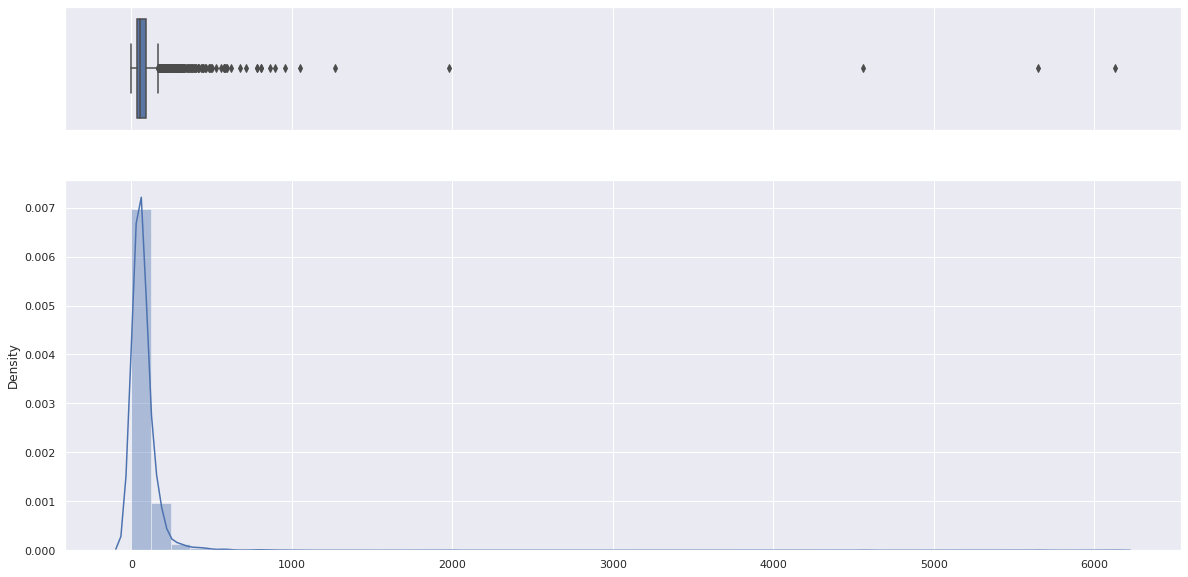



Variable: etylacetat
Minimum value: 0.0
Maximum value: 24452.25
Mean: 88.2540019116802
Median: 10.24425
Skewness: 22.529701516167613
0 count: 1937
Outlier count: 477




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


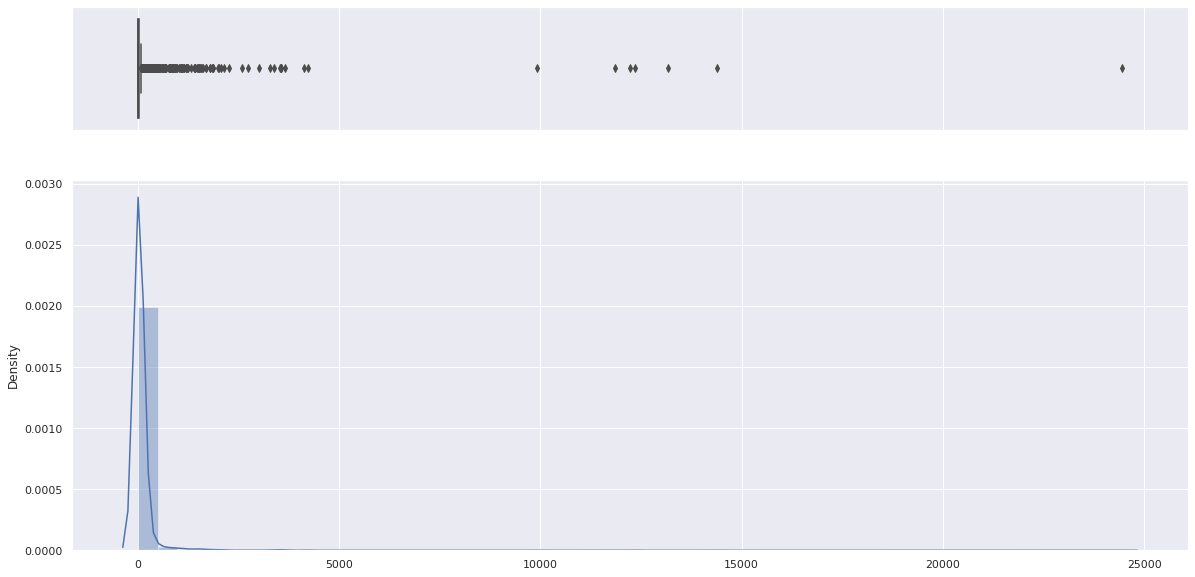



Variable: n-propanol
Minimum value: 0.0
Maximum value: 336825.0
Mean: 538.4113192136584
Median: 126.55842
Skewness: 28.036875175916414
0 count: 162
Outlier count: 294




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


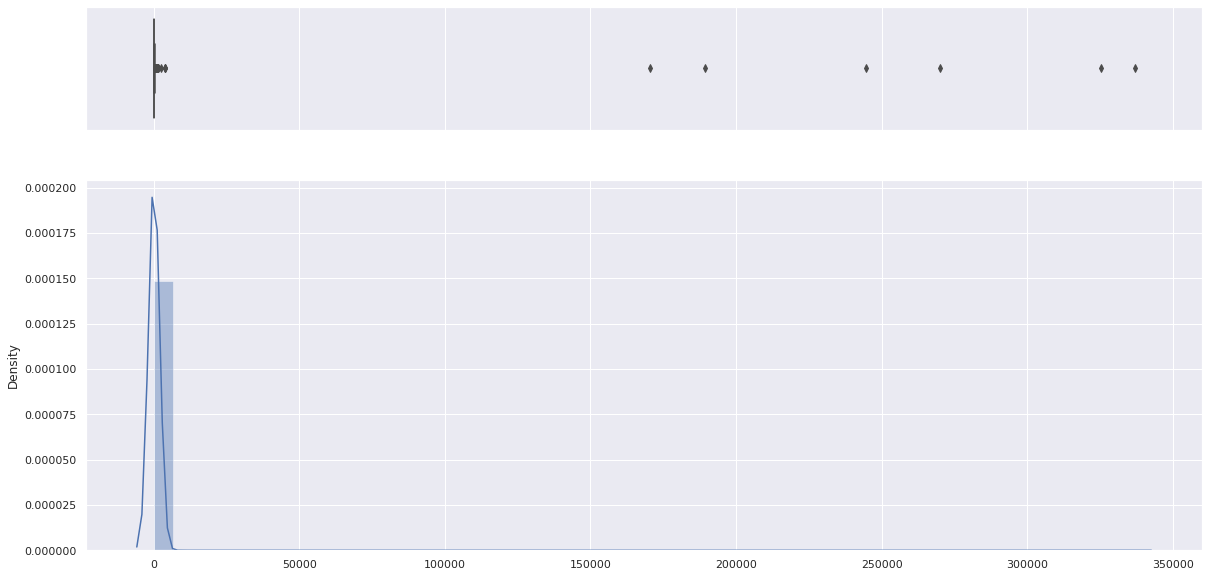



Variable: isobutanol
Minimum value: 0.0
Maximum value: 9754.78224
Mean: 140.93795051875566
Median: 98.15365
Skewness: 16.05306459236916
0 count: 93
Outlier count: 332




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


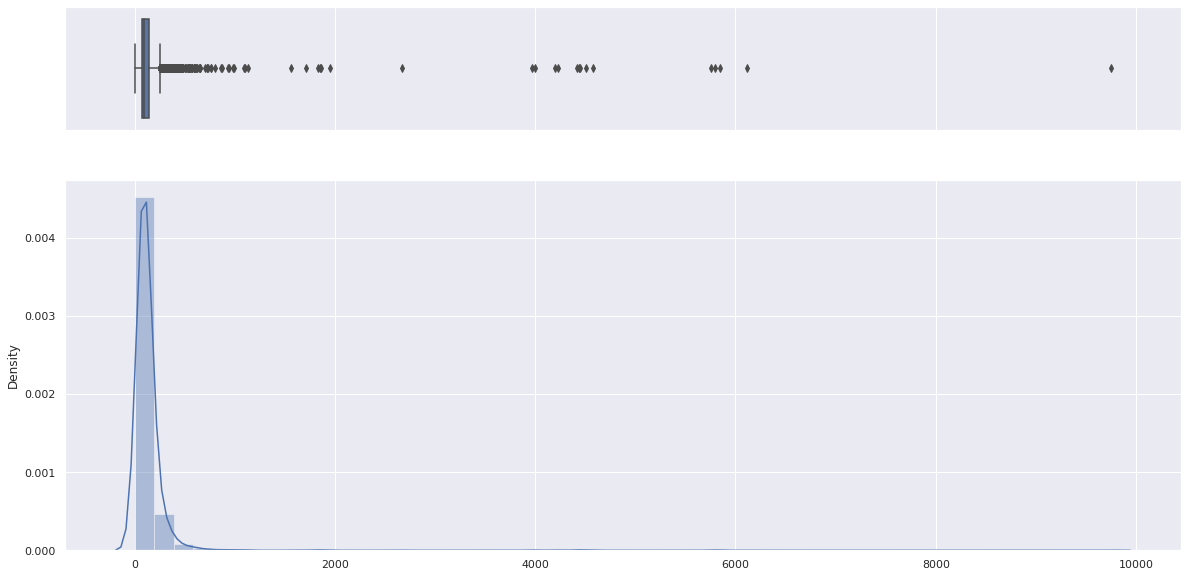



Variable: acetal
Minimum value: 0.0
Maximum value: 5299.57487
Mean: 20.82740713535254
Median: 0.0
Skewness: 19.227706874338672
0 count: 3215
Outlier count: 846




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


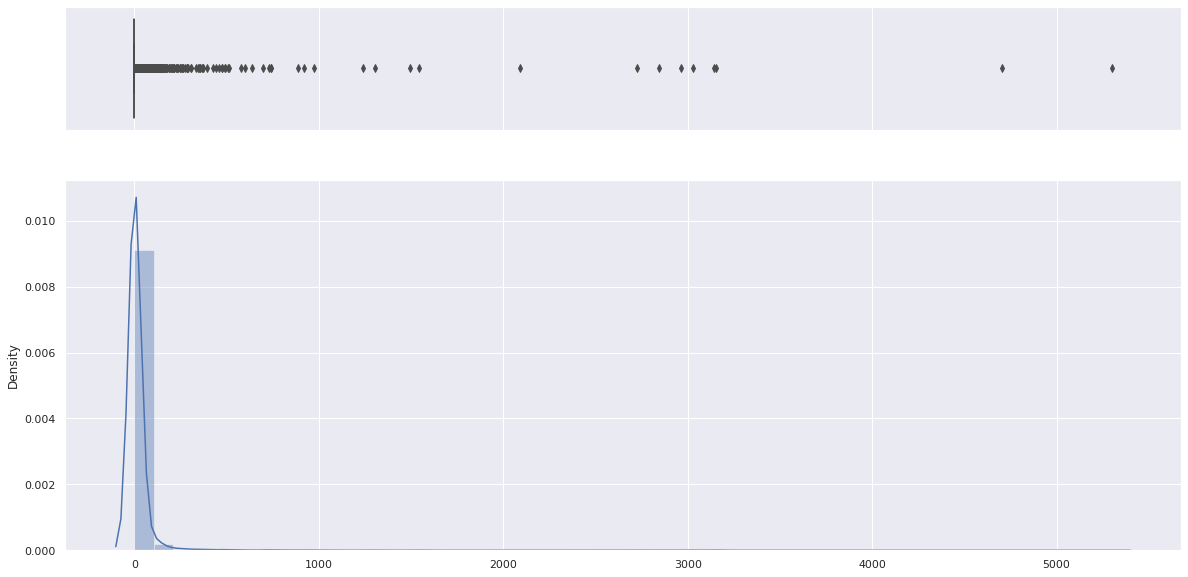



Variable: 3-metyl-1-butanol
Minimum value: 0.0
Maximum value: 8372.09323
Mean: 121.5479566294837
Median: 52.55873
Skewness: 12.346525257945261
0 count: 750
Outlier count: 460




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


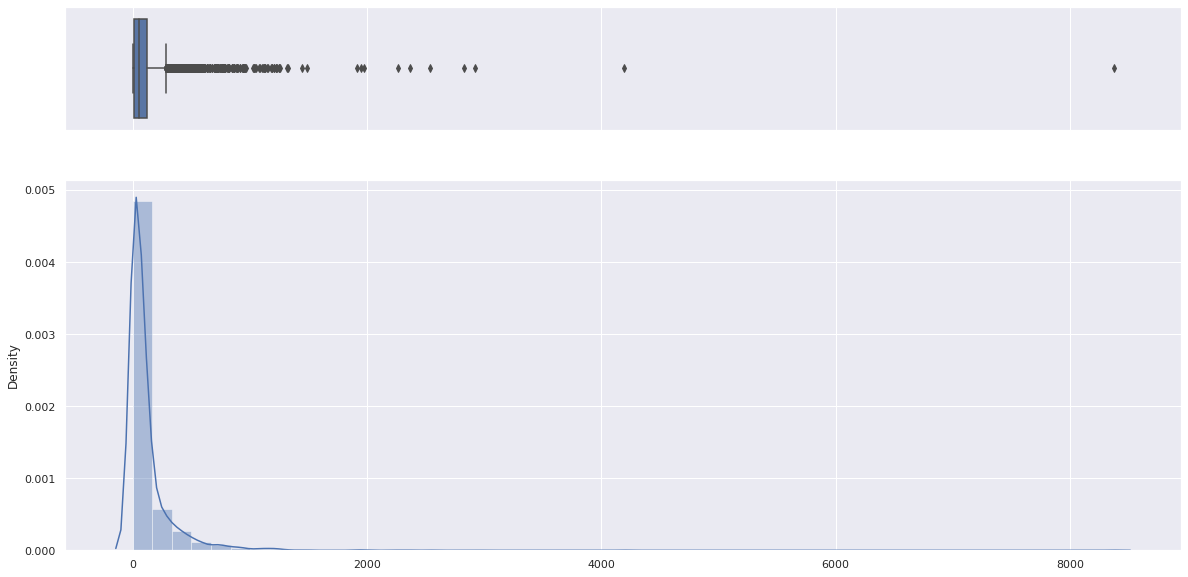



Variable: 2-metyl-1-butanol
Minimum value: 0.0
Maximum value: 397629.0
Mean: 185.85919386317
Median: 10.61814
Skewness: 60.03225394229842
0 count: 1734
Outlier count: 460




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


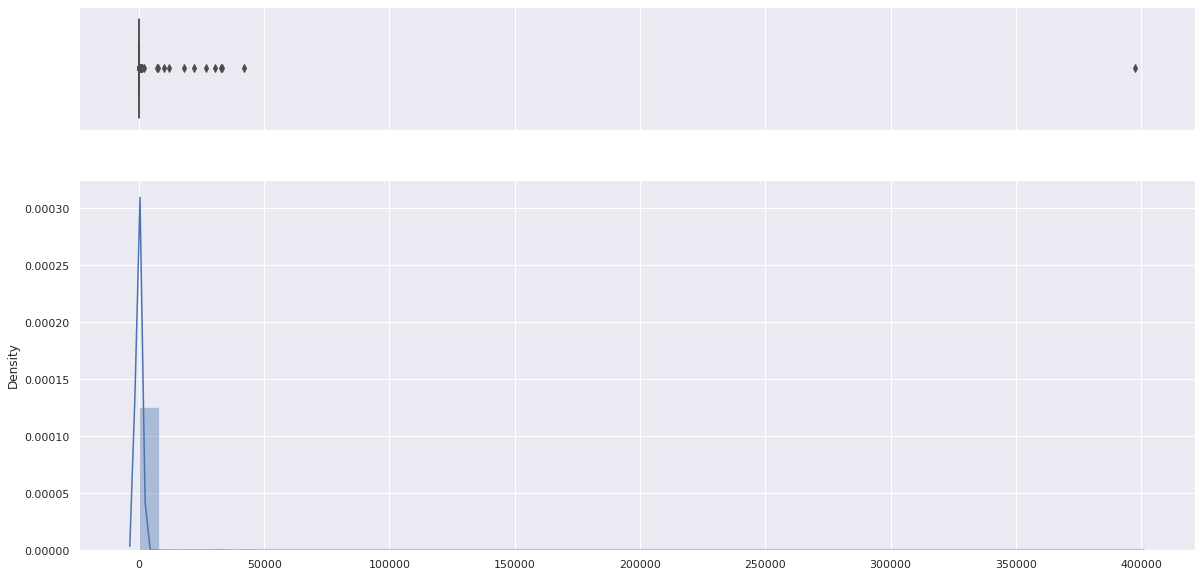

In [ ]:
clustering_data_ex = clustering_data # set clustering_data / clustering_data_logscale / clustering_data_sqrtscale 

for i in feature_vector:

  print('Variable:', i)
  print('Minimum value:',min(clustering_data_ex[i]))
  print('Maximum value:',max(clustering_data_ex[i]))
  print('Mean:',st.mean(clustering_data_ex[i]))
  print('Median:',st.median(clustering_data_ex[i]))
  print('Skewness:',skew(clustering_data_ex[i]))
  print('0 count:',clustering_data_ex[i][clustering_data_ex[i] == 0].count())
  # Extracting outliers
  outliers = [y for stat in boxplot_stats(clustering_data_ex[i]) for y in stat['fliers']]
  print('Outlier count:',len(outliers))
  # Skew for transformed data
  #print('Skewness for log transformed data:',skew(clustering_data_logscale[i]))
  #print('Skewness for square root transformed data:',skew(clustering_data_sqrtscale[i]))
  print('\n')
  sns.set(rc={'figure.figsize':(20,10)})
  # Cut the window in 2 parts
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
  # Add a graph in each part
  sns.boxplot(x=clustering_data_ex[i], ax=ax_box)
  sns.distplot(x=clustering_data_ex[i], ax=ax_hist)
  # Remove x axis name for the boxplot
  ax_box.set(xlabel='')
  plt.show()
  print('\n')

### **Correlation**

In [ ]:
from scipy.stats import spearmanr

clustering_data.corr(method='spearman')

,acetaldehyd,etylacetat,n-propanol,isobutanol,acetal,3-metyl-1-butanol,2-metyl-1-butanol
acetaldehyd,1.000000,0.155123,0.208717,0.124449,0.123448,0.102486,0.073142
etylacetat,0.155123,1.000000,0.124200,0.464295,0.467079,0.646554,0.603367
n-propanol,0.208717,0.124200,1.000000,0.501267,0.134423,0.234851,0.231190
isobutanol,0.124449,0.464295,0.501267,1.000000,0.313584,0.622772,0.570117
acetal,0.123448,0.467079,0.134423,0.313584,1.000000,0.327076,0.331102
3-metyl-1-butanol,0.102486,0.646554,0.234851,0.622772,0.327076,1.000000,0.864674
2-metyl-1-butanol,0.073142,0.603367,0.231190,0.570117,0.331102,0.864674,1.000000


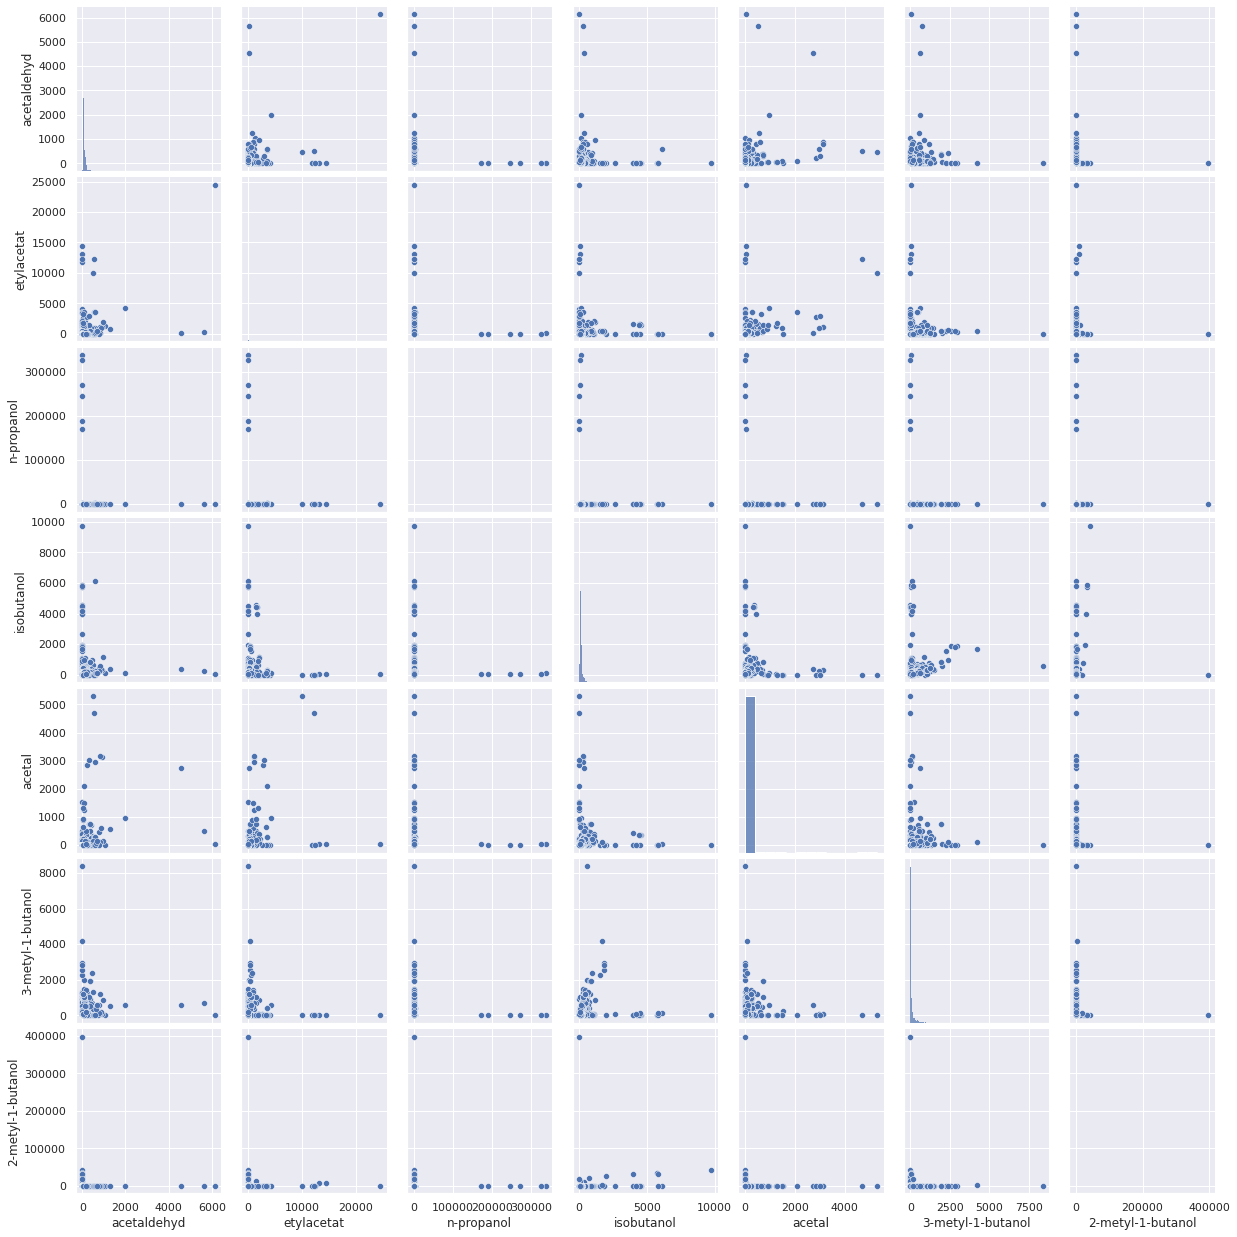

In [ ]:
sns.pairplot(clustering_data_ex)

## **Accessing Clustering Tendency**

###**Visual Assessment of Tendency**

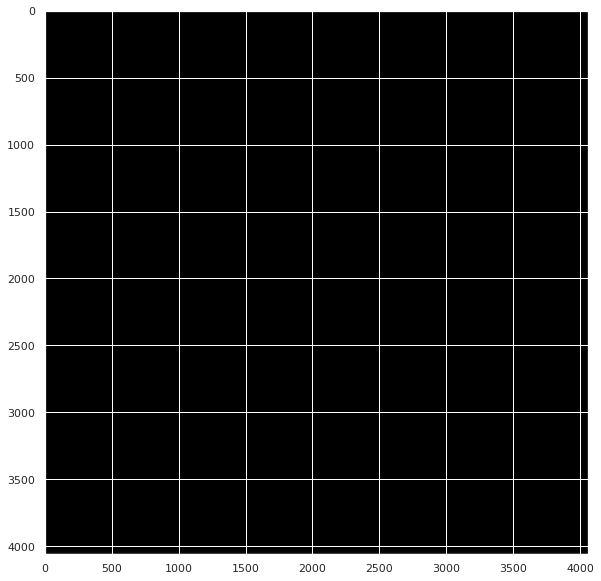

In [ ]:
#vat(clustering_data)
# output for original data, 7 features, euclidean distance

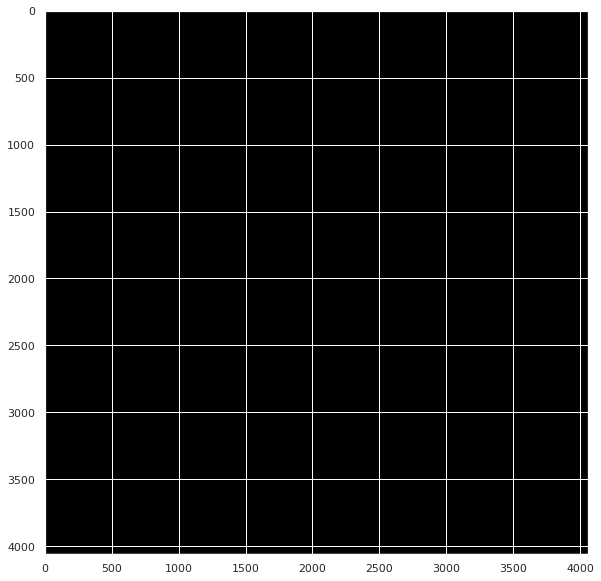

In [ ]:
#ivat(clustering_data)
# output for original data, 7 features, euclidean distance

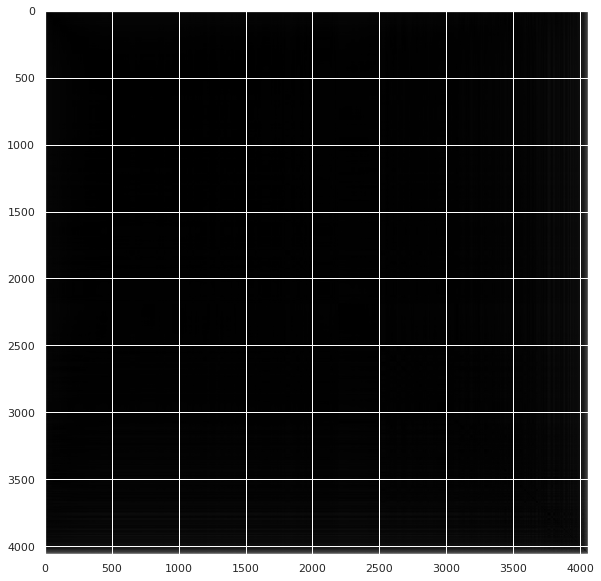

In [ ]:
#vat(scale(clustering_data))
# output for scaled data, 7 features, euclidean distance

In [ ]:
#### VAT & iVAT with Canberra as distance metric ####
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt


def vat_canberra(data, return_odm=False, figure_size=(10, 10)):
    """VAT means Visual assesement of tendency. basically, it allow to asses cluster tendency
    through a map based on the dissimiliraty matrix.


    Parameters
    ----------

    data : matrix
        numpy array

    return_odm : return the Ordered Dissimalirity Matrix
        boolean (default to False)

    figure_size : size of the VAT.
        tuple (default to (10,10))


    Return
    -------

    ODM : matrix
        the ordered dissimalarity matrix plotted.

    """

    ordered_dissimilarity_matrix = compute_ordered_dissimilarity_matrix_canberra(data)

    _, ax = plt.subplots(figsize=figure_size)
    ax.imshow(ordered_dissimilarity_matrix, cmap='gray', vmin=0, vmax=np.max(ordered_dissimilarity_matrix))

    if return_odm is True:
        return ordered_dissimilarity_matrix



def compute_ordered_dissimilarity_matrix_canberra(X):
    """The ordered dissimilarity matrix is used by visual assesement of tendency. It is a just a a reordering
    of the dissimilarity matrix.


    Parameters
    ----------

    X : matrix
        numpy array

    Return
    -------

    ODM : matrix
        the ordered dissimalarity matrix .

    """

    # Step 1 :

    observation_path = []

    matrix_of_pairwise_distance = pairwise_distances(X, metric="canberra")
    list_of_int = np.zeros(matrix_of_pairwise_distance.shape[0], dtype="int")

    index_of_maximum_value = np.argmax(matrix_of_pairwise_distance)

    column_index_of_maximum_value = index_of_maximum_value // matrix_of_pairwise_distance.shape[1]

    list_of_int[0] = column_index_of_maximum_value
    observation_path.append(column_index_of_maximum_value)

    K = np.linspace(0, matrix_of_pairwise_distance.shape[0] - 1, matrix_of_pairwise_distance.shape[0], dtype="int")
    J = np.delete(K, column_index_of_maximum_value)

    # Step 2 :

    for r in range(1, matrix_of_pairwise_distance.shape[0]):

        p, q = (-1, -1)

        mini = np.max(matrix_of_pairwise_distance)

        for candidate_p in observation_path:
            for candidate_j in J:
                if matrix_of_pairwise_distance[candidate_p, candidate_j] < mini:
                    p = candidate_p
                    q = candidate_j
                    mini = matrix_of_pairwise_distance[p, q]

        list_of_int[r] = q
        observation_path.append(q)

        ind_q = np.where(np.array(J) == q)[0][0]
        J = np.delete(J, ind_q)

    # Step 3

    ordered_matrix = np.zeros(matrix_of_pairwise_distance.shape)

    for column_index_of_maximum_value in range(ordered_matrix.shape[0]):
        for j in range(ordered_matrix.shape[1]):
            ordered_matrix[column_index_of_maximum_value, j] = matrix_of_pairwise_distance[
                list_of_int[column_index_of_maximum_value], list_of_int[j]]

    # Step 4 :

    return ordered_matrix



def ivat_canberra(data, return_odm=False, figure_size=(10, 10)):
    """iVat return a visualisation based on the Vat but more reliable and easier to
    interpret.


    Parameters
    ----------

    data : matrix
        numpy array

    return_odm : return the Ordered Dissimalirity Matrix
            boolean (default to False)

    figure_size : size of the VAT.
        tuple (default to (10,10))


    Return
    -------

    D_prim : matrix
        the ivat ordered dissimalarity matrix.

    """

    ordered_matrix = compute_ivat_ordered_dissimilarity_matrix_canberra(data)

    _, ax = plt.subplots(figsize=figure_size)
    ax.imshow(ordered_matrix, cmap='gray', vmin=0, vmax=np.max(ordered_matrix))

    if return_odm is True:
        return ordered_matrix



def compute_ivat_ordered_dissimilarity_matrix_canberra(X):
    """The ordered dissimilarity matrix is used by ivat. It is a just a a reordering
    of the dissimilarity matrix.


    Parameters
    ----------

    X : matrix
        numpy array

    Return
    -------

    D_prim : matrix
        the ordered dissimalarity matrix .

    """

    ordered_matrix = compute_ordered_dissimilarity_matrix_canberra(X)
    re_ordered_matrix = np.zeros((ordered_matrix.shape[0], ordered_matrix.shape[0]))

    for r in range(1, ordered_matrix.shape[0]):
        # Step 1 : find j for which D[r,j] is minimum and j in [1:r-1]

        j = np.argmin(ordered_matrix[r, 0:r])

        # Step 2 :

        re_ordered_matrix[r, j] = ordered_matrix[r, j]

        # Step 3 : pour c : 1,r-1 avec c !=j
        c_tab = np.array(range(0, r))
        c_tab = c_tab[c_tab != j]

        for c in c_tab:
            re_ordered_matrix[r, c] = max(ordered_matrix[r, j], re_ordered_matrix[j, c])
            re_ordered_matrix[c, r] = re_ordered_matrix[r, c]

    return re_ordered_matrix

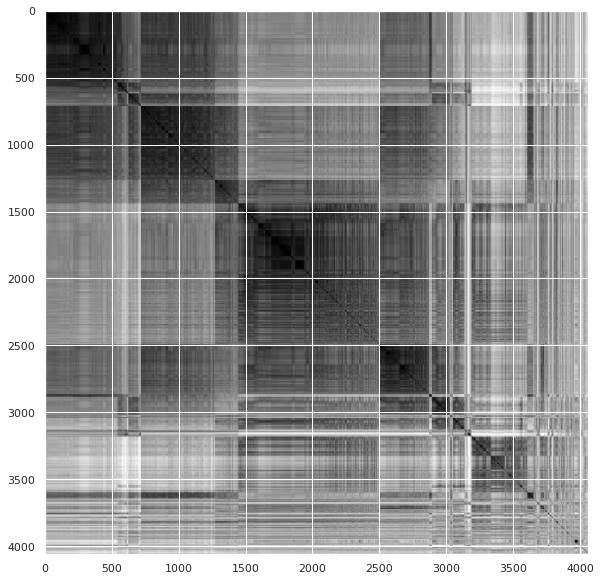

In [ ]:
vat_canberra(clustering_data)
# output for original data, 7 features, canberra distance 

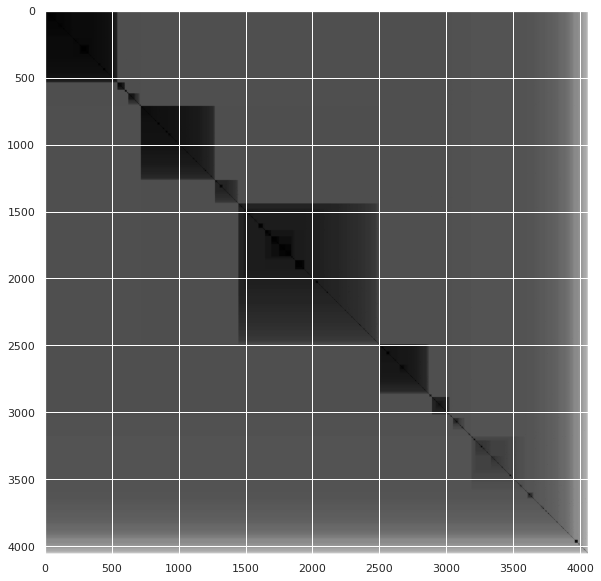

In [ ]:
ivat_canberra(clustering_data)
# output for original data, 7 features, canberra distance 

###**Hopkins Statistic**

In [ ]:
#Hopkins statistic euclidean distance, original data
#hopkins(clustering_data,clustering_data.shape[0])

# Output for original data, 7 features: 0.0010904084302001112
# Output for log transformed data, 7 features: 0.05356377454698967
# Output for sqrt transformed data, 7 features: 0.006075592088194366

0.0010840903170985024

In [ ]:
#Hopkins statistic euclidean distance, scaled data
#hopkins(scale(clustering_data),clustering_data.shape[0])

0.0029138762804584223

In [ ]:
#### Hopkins Statistic with Canberra distance metric ####
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd


def hopkins_canberra(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """

    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)

    # Sample n observations from D : P

    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')

    data_frame_sample = data_frame.sample(n=sampling_size)

    # Get the distance to their neirest neighbors in D : X

    tree = BallTree(data_frame, leaf_size=2, metric="canberra")
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]

    # Randomly simulate n points with the same variation as in D : Q.

    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()

    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)

    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)

    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)

    # Get the distance to their neirest neighbors in D : Y

    tree = BallTree(data_frame, leaf_size=2, metric="canberra")
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist

    # return the hopkins score

    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)

    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')

    return x / (x + y)

In [ ]:
#Hopkins statistic canberra distance, original data
hopkins_canberra(clustering_data,clustering_data.shape[0])

0.057278870393811944

In [ ]:
#Hopkins statistic canberra distance, scaled data
hopkins_canberra(scale(clustering_data),clustering_data.shape[0])

0.07019347014515502

## **Clustering**

## **Determining Optimal number of clusters**

From the library NbClust the function NbClust was used to check the optimum number of clusters by Majority rule over 30 different indices. 

1. Original data (7 features, Euclidean)
* kmeans: 3 clusters
* ward.D: 3 clusters
* pam: 3 clusters(elbow method), 2,3 clusters(silhouette method)

2. Log transformed data (7 features, Euclidean)
* kmeans: 2, 9 clusters
* ward.D: 3 clusters

3. Square root transformed data (7 features, Euclidean)
* kmeans: 3 clusters
* ward.D: 4 clusters

4. Original data (4 features, Euclidean)
* kmeans: 3 clusters
* ward.D: 3 clusters

5. Log transformed data (4 features, Euclidean)
* kmeans: 2 clusters
* ward.D: 2 clusters

6. Square root transformed data (4 features, Euclidean)
* kmeans: 2 clusters
* ward.D: 2, 4 clusters

7. Original data (7 features, Canberra)
* kmeans: 3 clusters
* ward.D: 2 clusters
* ward.D2: 2 clusters
* average: 2 clusters
* pam: 11 clusters(elbow method), 3,4 clusters(silhouette method), clusters(gap)

8. Log transformed data (7 features, Canberra)
* kmeans: 2 clusters
* ward.D: 3 clusters

9. Square root transformed data (7 features, Canberra)
* kmeans: 2 clusters
* ward.D: 2 clusters

10. Original data (4 features, Canberra)
* kmeans: 3 clusters 
* ward.D: 2 clusters

11. Log transformed data (4 features, Canberra)
* kmeans: 2 clusters
* ward.D: 3 clusters

12. Square root transformed data (4 features, Canberra)
* kmeans: 2, 14 clusters
* ward.D: 2 clusters


## **Method 1: K-means**

In [ ]:
#k-means using pyclustering
metric = distance_metric(type_metric.CANBERRA)

# initialize initial centers using K-Means++ method
initial_centers = kmeans_plusplus_initializer(clustering_data_input, 3).initialize()

# create instance of K-Means algorithm with prepared centers
kmeans_instance = kmeans(clustering_data_input, initial_centers, metric=metric)

# run cluster analysis and obtain results
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()

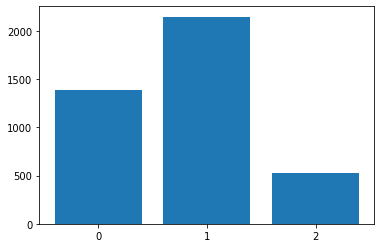

{'0': 1388, '1': 2145, '2': 528}


In [ ]:
clusters_list = {
  "0": size(clusters[0]),
  "1": size(clusters[1]),
  "2": size(clusters[2])
  }

plt.bar(range(len(clusters_list)), list(clusters_list.values()), align='center')
plt.xticks(range(len(clusters_list)), list(clusters_list.keys()))
plt.show()

print(clusters_list)

***Inspecting data points that fall into specific cluster***

In [ ]:
## Define a function to extract the indices of the cluster_id you provide
#def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
#    return np.where(labels_array == clustNum)[0]

In [ ]:
## Gives me the indices of data points in the specified cluster 
#indices = ClusterIndicesNumpy(2, kmeans.labels_)
#indices

In [ ]:
# Points in cluster-1, 7 features, original scale 
#clustering_data_input[indices]
#clustering_data.iloc[indices,:]

In [ ]:
# Removing data points that fall into cluster 1, from original clustering_data_input array  
#clustering_data_input_del = np.delete(clustering_data_input, indices, axis=0)

## **Method 2: PAM**

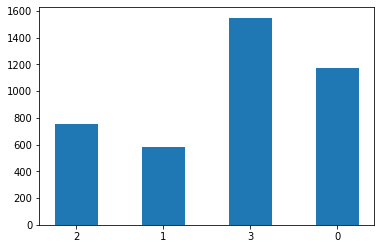

In [ ]:
num_clusters_kmedoids = 4 #set the optimum number of clusters according to your Silhouette coefficient or Elbow plot

kmedoids = KMedoids(n_clusters=num_clusters_kmedoids, init='k-medoids++', metric='canberra').fit(clustering_data_input)
elbow_point_labels_kmedoids = kmedoids.labels_

labels, values = zip(*Counter(elbow_point_labels_kmedoids).items())

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
plt.xticks(indexes , labels)
plt.show()

In [ ]:
#Number of data points in different clusters
labels, values

((2, 1, 3, 0), (756, 584, 1549, 1172))

## **Method 3: Heirarchical Clustering**

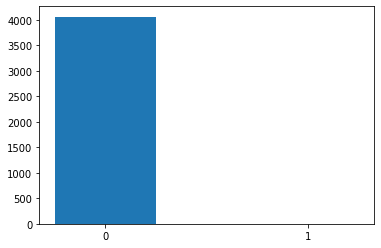

In [ ]:
num_clusters = 2 #set the optimum number of clusters here

cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='canberra', linkage='average').fit(clustering_data_input)
cluster_labels = cluster.labels_

labels, values = zip(*Counter(cluster_labels).items())

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
plt.xticks(indexes , labels)
plt.show()

In [ ]:
#Number of data points in different clusters
labels, values

((0, 1), (4060, 1))

## **Method 4: OPTICS**

In [ ]:
minpts1 = 2*clustering_data_input.shape[1]
minpts2 = round(np.log(clustering_data_input.shape[0]))
minpts3 = clustering_data_input.shape[1]+1
minpts = minpts1 # Set minpts here
minpts

14

[[  -1  757]
 [   0  534]
 [   1   55]
 [   2   15]
 [   3   77]
 [   4  553]
 [   5  169]
 [   6 1050]
 [   7  369]
 [   8   19]
 [   9  132]
 [  10   63]
 [  11  117]
 [  12   13]
 [  13   59]
 [  14   15]
 [  15   42]
 [  16   22]]


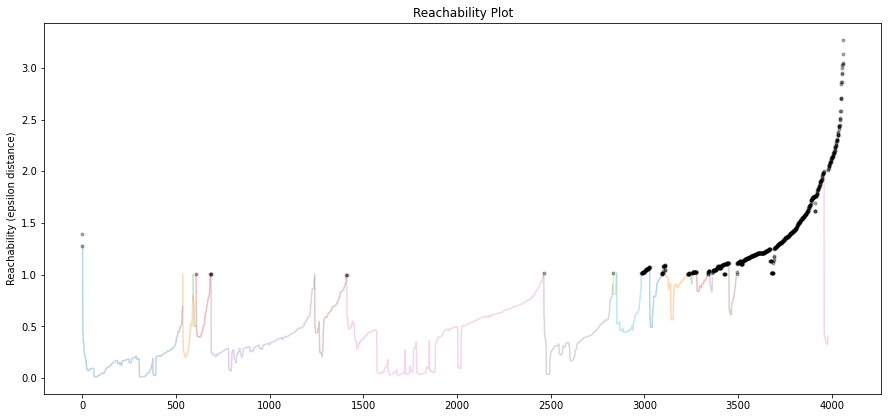

In [ ]:
clust = OPTICS(min_samples=minpts, metric='canberra', cluster_method='dbscan', eps=1)
clust.fit(clustering_data_input)

space = np.arange(clustering_data_input.shape[0])
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

plt.figure(figsize=(15, 15))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])

# Reachability plot
for klass in range(0, 91):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
#ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
#ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

plt.show()

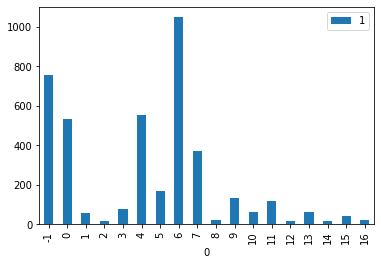

In [ ]:
frequencies_df = pd.DataFrame(frequencies)
frequencies_df.head()

ax = frequencies_df.plot.bar(x=0, y=1)

#plt.bar(indexes, values, width)
#plt.xticks(indexes , labels)
#plt.show()

## **Classification**

In [ ]:
 new_df = clustering_data
 new_df.insert(loc=7, column='label', value=clust.labels_, allow_duplicates=False)
 new_df.head()

,acetaldehyd,etylacetat,n-propanol,isobutanol,acetal,3-metyl-1-butanol,2-metyl-1-butanol,label
0,51.35220,26.72761,194.58599,218.69758,0.00000,0.0,0.0,-1
1,50.67174,22.06754,205.00416,174.78640,0.00000,0.0,0.0,-1
2,49.56403,36.79537,217.92374,197.89682,0.00000,0.0,0.0,-1
3,53.37374,0.00000,139.86568,44.64332,0.00000,0.0,0.0,0
5,28.50794,0.00000,71.26326,58.97657,12.19513,0.0,0.0,8


In [ ]:
#################################### 
# READ BEFORE EXECUTING THIS CHUNK #
####################################

# Discarding small clusters
#new_df = new_df.drop(new_df[new_df.label.isin(['2','8','12','14','16'])].index)
#new_df.shape

### **Method 1: K-Nearest Neighbors**

In [ ]:
# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
X = np.array(new_df.loc[:, new_df.columns != 'label'])
y = np.array(new_df.loc[:, new_df.columns == 'label']).ravel()
# configure the cross-validation procedure
cv_outer = StratifiedKFold(n_splits=13, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X, y):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = StratifiedKFold(n_splits=12, shuffle=True, random_state=1)
	# define the model
	model = KNeighborsClassifier(metric='canberra')
	# define search space
	space = dict()
	space['n_neighbors'] = range(1,21)
	# define search
	search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# evaluate the model
	acc = accuracy_score(y_test, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=0.978, est=0.973, cfg={'n_neighbors': 2}
>acc=0.974, est=0.973, cfg={'n_neighbors': 2}
>acc=0.958, est=0.971, cfg={'n_neighbors': 2}
>acc=0.978, est=0.972, cfg={'n_neighbors': 2}
>acc=0.968, est=0.971, cfg={'n_neighbors': 2}
>acc=0.974, est=0.974, cfg={'n_neighbors': 2}
>acc=0.984, est=0.973, cfg={'n_neighbors': 2}
>acc=0.968, est=0.970, cfg={'n_neighbors': 2}
>acc=0.962, est=0.974, cfg={'n_neighbors': 2}
>acc=0.974, est=0.973, cfg={'n_neighbors': 2}
>acc=0.971, est=0.974, cfg={'n_neighbors': 2}
>acc=0.974, est=0.971, cfg={'n_neighbors': 2}
>acc=0.984, est=0.969, cfg={'n_neighbors': 2}
Accuracy: 0.973 (0.007)


### **Method 2: AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC

In [ ]:
# manual nested cross-validation for adaptive boosting on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
X = np.array(new_df.loc[:, new_df.columns != 'label'])
y = np.array(new_df.loc[:, new_df.columns == 'label']).ravel()
# configure the cross-validation procedure
cv_outer = StratifiedKFold(n_splits=13, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X, y):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = StratifiedKFold(n_splits=12, shuffle=True, random_state=1)
	# define the model
	model = AdaBoostClassifier() # Decision trees as the base classifier 
	# define search space
	space = dict()
	space['n_estimators'] = range(1,20)
	space['learning_rate'] = np.linspace(0.1,1,10)
  # define search
	search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# evaluate the model
	acc = accuracy_score(y_test, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=0.837, est=0.823, cfg={'learning_rate': 0.1, 'n_estimators': 14}
>acc=0.827, est=0.824, cfg={'learning_rate': 0.1, 'n_estimators': 14}


KeyboardInterrupt: ignored

### **Method 3: Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#### Gini and search space #####
# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
X = np.array(new_df.loc[:, new_df.columns != 'label'])
y = np.array(new_df.loc[:, new_df.columns == 'label']).ravel()
# configure the cross-validation procedure
cv_outer = StratifiedKFold(n_splits=13, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X, y):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = StratifiedKFold(n_splits=12, shuffle=True, random_state=1)
	# define the model
	model = RandomForestClassifier(max_features=None, oob_score=True, n_jobs=-1)
	# define search space
	space = dict()
	space['n_estimators'] = np.linspace(50,150,21).astype(int)
	#space['criterion'] = ['gini', 'entropy']
  # define search
	search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# evaluate the model
	acc = accuracy_score(y_test, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=0.974, est=0.972, cfg={'n_estimators': 70}
>acc=0.965, est=0.974, cfg={'n_estimators': 75}
>acc=0.971, est=0.970, cfg={'n_estimators': 125}
>acc=0.962, est=0.973, cfg={'n_estimators': 125}
>acc=0.965, est=0.973, cfg={'n_estimators': 85}
>acc=0.978, est=0.971, cfg={'n_estimators': 80}
>acc=0.990, est=0.970, cfg={'n_estimators': 145}
>acc=0.974, est=0.967, cfg={'n_estimators': 125}
>acc=0.962, est=0.975, cfg={'n_estimators': 130}
>acc=0.974, est=0.971, cfg={'n_estimators': 95}
>acc=0.962, est=0.971, cfg={'n_estimators': 70}
>acc=0.971, est=0.974, cfg={'n_estimators': 70}
>acc=0.981, est=0.972, cfg={'n_estimators': 75}
Accuracy: 0.971 (0.008)


### **Method 4: Neural Networks**

In [ ]:
clf = MLPClassifier().fit(X_train, y_train)
yhat = clf.predict(X_test)
accuracy_score(y_test, yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9233226837060703

In [ ]:
# manual nested cross-validation for random forest on a classification dataset

# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
X = np.array(new_df.loc[:, new_df.columns != 'label'])
y = np.array(new_df.loc[:, new_df.columns == 'label']).ravel()
# configure the cross-validation procedure
cv_outer = StratifiedKFold(n_splits=13, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X, y):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = StratifiedKFold(n_splits=12, shuffle=True, random_state=1)
	# define the model
	model = MLPClassifier()
	# define search space
	space = dict()
	space['max_iter'] = np.linspace(200,500,21).astype(int)
	#space['criterion'] = ['gini', 'entropy']
  # define search
	search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# evaluate the model
	acc = accuracy_score(y_test, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=0.920, est=0.929, cfg={'max_iter': 260}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


>acc=0.955, est=0.929, cfg={'max_iter': 470}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (215) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


>acc=0.917, est=0.931, cfg={'max_iter': 245}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


>acc=0.920, est=0.930, cfg={'max_iter': 500}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (215) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


>acc=0.946, est=0.928, cfg={'max_iter': 395}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (245) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


>acc=0.952, est=0.926, cfg={'max_iter': 425}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


>acc=0.968, est=0.927, cfg={'max_iter': 380}
>acc=0.913, est=0.931, cfg={'max_iter': 440}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


>acc=0.897, est=0.931, cfg={'max_iter': 305}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


>acc=0.929, est=0.928, cfg={'max_iter': 425}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (215) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


>acc=0.920, est=0.925, cfg={'max_iter': 320}
>acc=0.904, est=0.932, cfg={'max_iter': 425}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (215) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


>acc=0.926, est=0.927, cfg={'max_iter': 485}
Accuracy: 0.928 (0.020)


In [ ]:
np.linspace(200,500,21)

array([200., 215., 230., 245., 260., 275., 290., 305., 320., 335., 350.,
       365., 380., 395., 410., 425., 440., 455., 470., 485., 500.])

## **Dimensionality reduction**

### **Method 1: PCA**

In [ ]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
df = pd.DataFrame()

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(clustering_data)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.71297538 0.28237021 0.00311225]


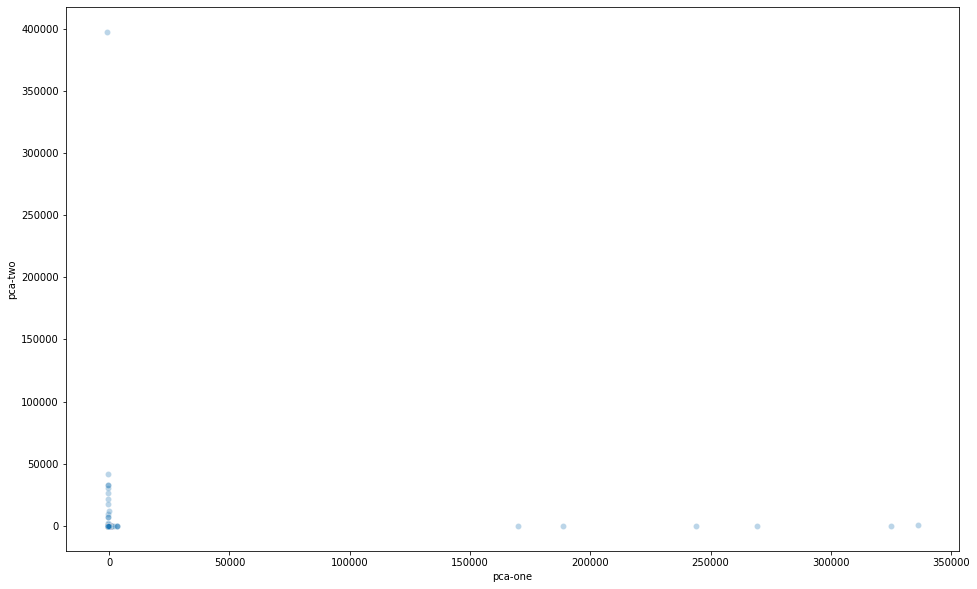

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    data=df,
    legend="full",
    alpha=0.3
)

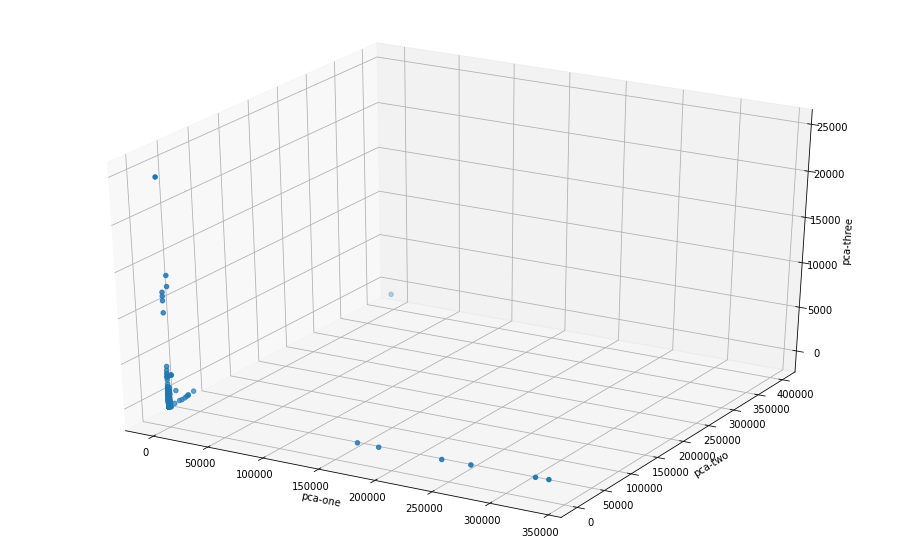

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"]
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### **Method 2: t-SNE**

In [ ]:
tsne_10 = TSNE(n_components=3, verbose=1, perplexity=10, n_iter=300, metric="canberra")
tsne_results_10 = tsne_10.fit_transform(clustering_data)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 4061 samples in 0.008s...
[t-SNE] Computed neighbors for 4061 samples in 0.398s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4061
[t-SNE] Computed conditional probabilities for sample 2000 / 4061
[t-SNE] Computed conditional probabilities for sample 3000 / 4061
[t-SNE] Computed conditional probabilities for sample 4000 / 4061
[t-SNE] Computed conditional probabilities for sample 4061 / 4061
[t-SNE] Mean sigma: 0.209878
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.686073
[t-SNE] KL divergence after 300 iterations: 1.655813


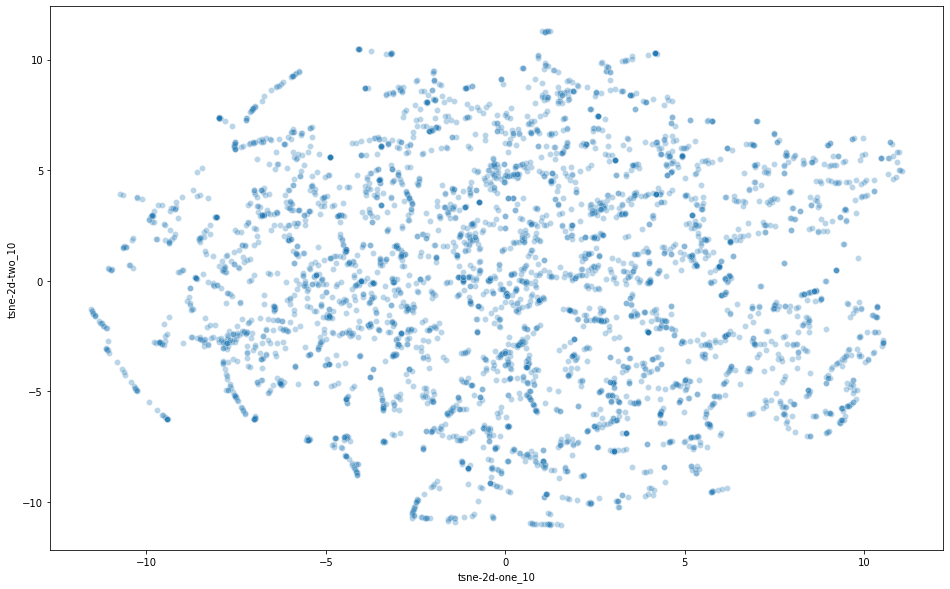

In [ ]:
df['tsne-2d-one_10'] = tsne_results_10[:,0]
df['tsne-2d-two_10'] = tsne_results_10[:,1]
df['tsne-2d-three_10'] = tsne_results_10[:,2]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one_10", y="tsne-2d-two_10",
    data=df,
    legend="full",
    alpha=0.3
)

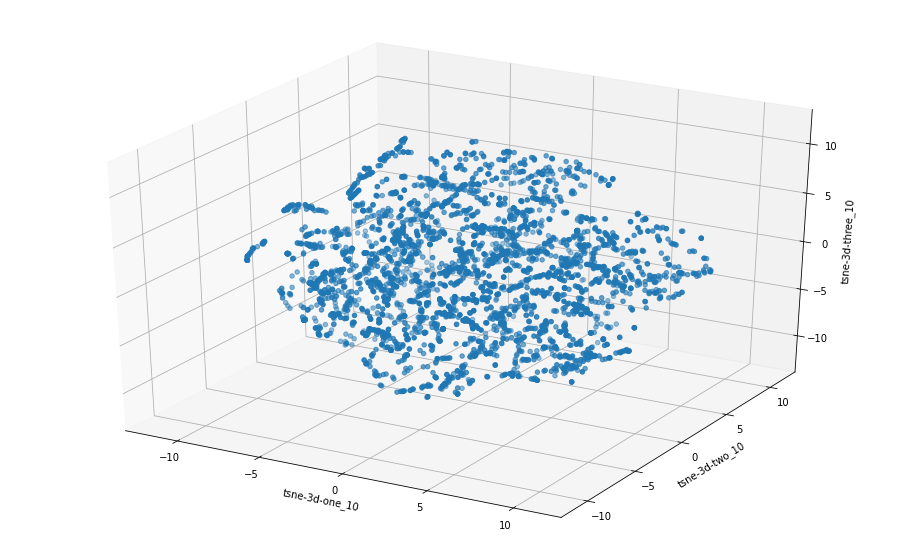

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df["tsne-2d-one_10"], 
    ys=df["tsne-2d-two_10"], 
    zs=df["tsne-2d-three_10"]
)
ax.set_xlabel('tsne-3d-one_10')
ax.set_ylabel('tsne-3d-two_10')
ax.set_zlabel('tsne-3d-three_10')
plt.show()

In [ ]:
tsne = TSNE(n_components=3, verbose=1, perplexity= 25, n_iter=300, metric="canberra")
tsne_results = tsne.fit_transform(clustering_data)

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 4061 samples in 0.007s...
[t-SNE] Computed neighbors for 4061 samples in 0.498s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4061
[t-SNE] Computed conditional probabilities for sample 2000 / 4061
[t-SNE] Computed conditional probabilities for sample 3000 / 4061
[t-SNE] Computed conditional probabilities for sample 4000 / 4061
[t-SNE] Computed conditional probabilities for sample 4061 / 4061
[t-SNE] Mean sigma: 0.298128
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.358429
[t-SNE] KL divergence after 300 iterations: 1.302240


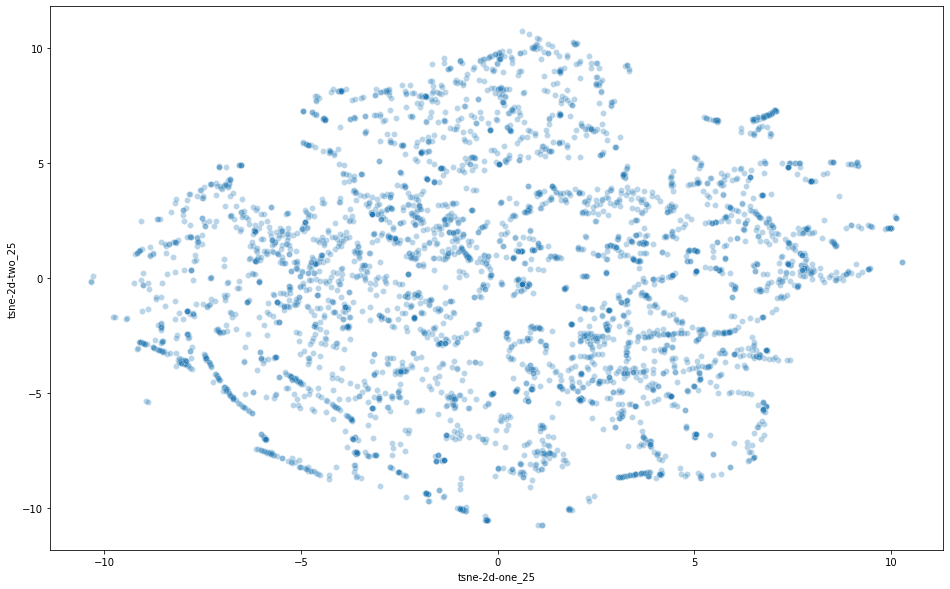

In [ ]:
df['tsne-2d-one_25'] = tsne_results[:,0]
df['tsne-2d-two_25'] = tsne_results[:,1]
df['tsne-2d-three_25'] = tsne_results[:,2]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one_25", y="tsne-2d-two_25",
    data=df,
    legend="full",
    alpha=0.3
)

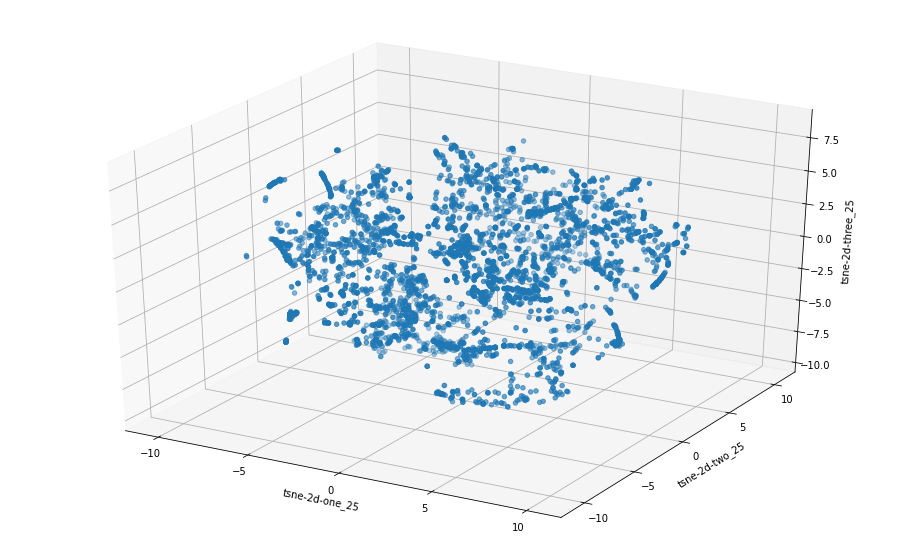

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df["tsne-2d-one_25"], 
    ys=df["tsne-2d-two_25"], 
    zs=df["tsne-2d-three_25"]
)
ax.set_xlabel('tsne-2d-one_25')
ax.set_ylabel('tsne-2d-two_25')
ax.set_zlabel('tsne-2d-three_25')
plt.show()

In [ ]:
tsne_45 = TSNE(n_components=3, verbose=1, perplexity=45, n_iter=300, metric="canberra")
tsne_results_45 = tsne_45.fit_transform(clustering_data)

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 4061 samples in 0.008s...
[t-SNE] Computed neighbors for 4061 samples in 0.582s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4061
[t-SNE] Computed conditional probabilities for sample 2000 / 4061
[t-SNE] Computed conditional probabilities for sample 3000 / 4061
[t-SNE] Computed conditional probabilities for sample 4000 / 4061
[t-SNE] Computed conditional probabilities for sample 4061 / 4061
[t-SNE] Mean sigma: 0.362584
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.831619
[t-SNE] KL divergence after 300 iterations: 1.096224


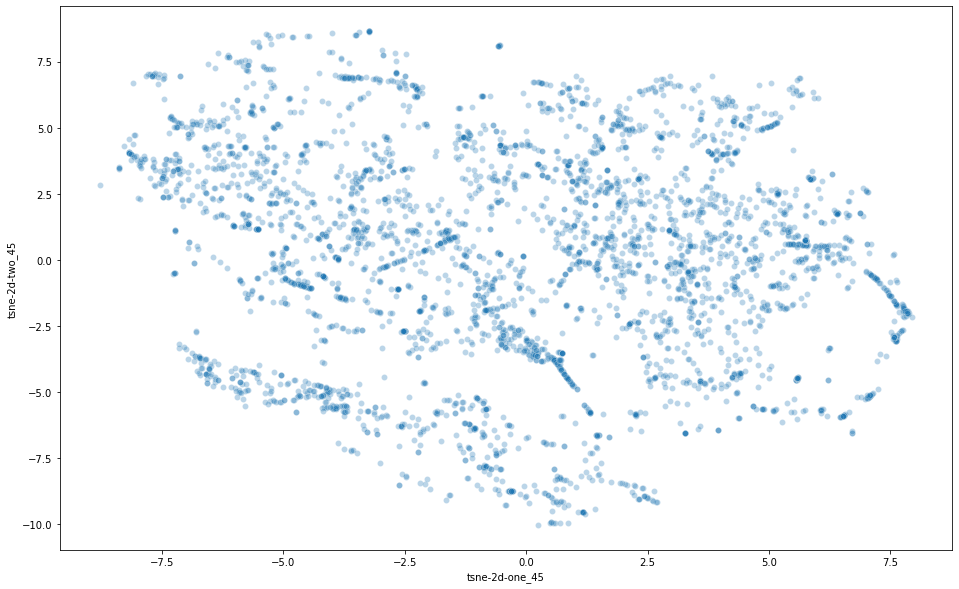

In [ ]:
df['tsne-2d-one_45'] = tsne_results_45[:,0]
df['tsne-2d-two_45'] = tsne_results_45[:,1]
df['tsne-2d-three_45'] = tsne_results_45[:,2]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one_45", y="tsne-2d-two_45",
    data=df,
    legend="full",
    alpha=0.3
)

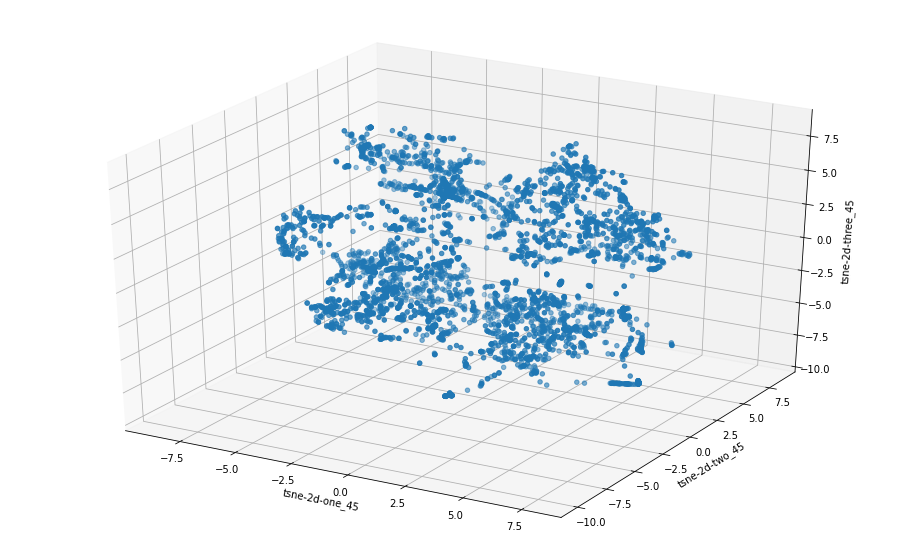

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df["tsne-2d-one_45"], 
    ys=df["tsne-2d-two_45"], 
    zs=df["tsne-2d-three_45"]
)
ax.set_xlabel('tsne-2d-one_45')
ax.set_ylabel('tsne-2d-two_45')
ax.set_zlabel('tsne-2d-three_45')
plt.show()